<a href="https://colab.research.google.com/github/Vict0r-13/Projeto-ML-Recomenda-o-de-Livros/blob/main/Recomenda%C3%A7%C3%A3o_de_Livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>## KNN

In [1]:
import pandas as pd

In [2]:
#LOCALIZAÇÃO DOS DATASETS
books = pd.read_csv('dados_limpos_6.csv')

In [3]:
#Verificando os dados
books.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,98391,034545104X,9,"morrow, georgia, usa",52,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,240144,034545104X,3,"muskego, wisconsin, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,23768,0446520802,6,"st. louis, missouri, usa",45,The Notebook,Nicholas Sparks,1996,Warner Books
3,30711,0446520802,6,"sydney, new south wales, australia",32,The Notebook,Nicholas Sparks,1996,Warner Books
4,185233,0446520802,7,"winnemucca, nevada, usa",31,The Notebook,Nicholas Sparks,1996,Warner Books


In [4]:
colunas_chaves = ['User-ID','ISBN']
# Verifica se há duplicatas com base nas colunas-chave
duplicatas = books.duplicated(subset=colunas_chaves, keep=False)

# Filtra as linhas duplicadas
linhas_duplicadas = books[duplicatas].value_counts()

# Se linhas_duplicadas estiver vazio, não há duplicatas
if linhas_duplicadas.empty:
    print("Não há avaliações duplicadas.")
else:
    print("Avaliações duplicadas encontradas:")
    print(linhas_duplicadas)

Não há avaliações duplicadas.


Não há avaliações duplicadas.

In [5]:
#TRASNFORMANDO USUARIOS EM VARIÁVEIS ATRAVÉS DA FUNÇÃO 'PIVOT'

books_pivot = books.pivot_table(columns='User-ID' , index='Book-Title', values = 'Book-Rating')

#VISUALIZANDO O ARQUIVO TRANSFORMADO
books_pivot.head(20)

User-ID,2033,2276,4017,4385,5582,6251,6543,7286,7346,8067,...,268300,268932,270713,271448,271705,273113,274061,274301,275970,277427
Book-Title,,,,,,,,,,,,,,,,,,,,,
Dark Justice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final Fantasy Anthology: Official Strategy Guide (Brady Games),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Highland Desire (Zebra Splendor Historical Romances),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nonbook Materials: The Organization of Integrated Collections,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Space (Star Trek The Next Generation, Book 47)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Zone (Star Trek The Next Generation, Book 48)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#TRANSFORMANDO VALORES NULOS EM 0
books_pivot.fillna(0,inplace=True)
books_pivot.head(20)

User-ID,2033,2276,4017,4385,5582,6251,6543,7286,7346,8067,...,268300,268932,270713,271448,271705,273113,274061,274301,275970,277427
Book-Title,,,,,,,,,,,,,,,,,,,,,
Dark Justice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Highland Desire (Zebra Splendor Historical Romances),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nonbook Materials: The Organization of Integrated Collections,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Zone (Star Trek The Next Generation, Book 48)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#IMPORTANDO PACOTE SCIPY PARA CRIAR MATRIZ SPARSA PARA QUE SEJA POSSIVEL COMPACTAR A QUANTIDADE DE ZEROS EXISTENTES
#DE UMA FORMA VIRTUALIZADA PARA FACILITAR O PROCESSAMENTO DA MÁQUINA DURANTE A EXECUÇÃO DO MODELO
from scipy.sparse import csr_matrix

#TRANSFORMANDO O DATASET EM MATRIZ SPARSA
books_sparse =csr_matrix(books_pivot)

In [8]:
#VISUALIZANDO O TIPO DE OBJETO
type(books_sparse)

scipy.sparse._csr.csr_matrix

In [9]:
#IMPORTANDO O ALGORITMO KNN DO SCIKIT LEARN
from sklearn.neighbors import NearestNeighbors

In [10]:
#CRIANDO E TREINANDO O MODELO PREDITIVO
Knn_Books = NearestNeighbors(algorithm='brute')
Knn_Books.fit(books_sparse)

NearestNeighbors(algorithm='brute')

Qual o nome do último livro que você leu? Coraline


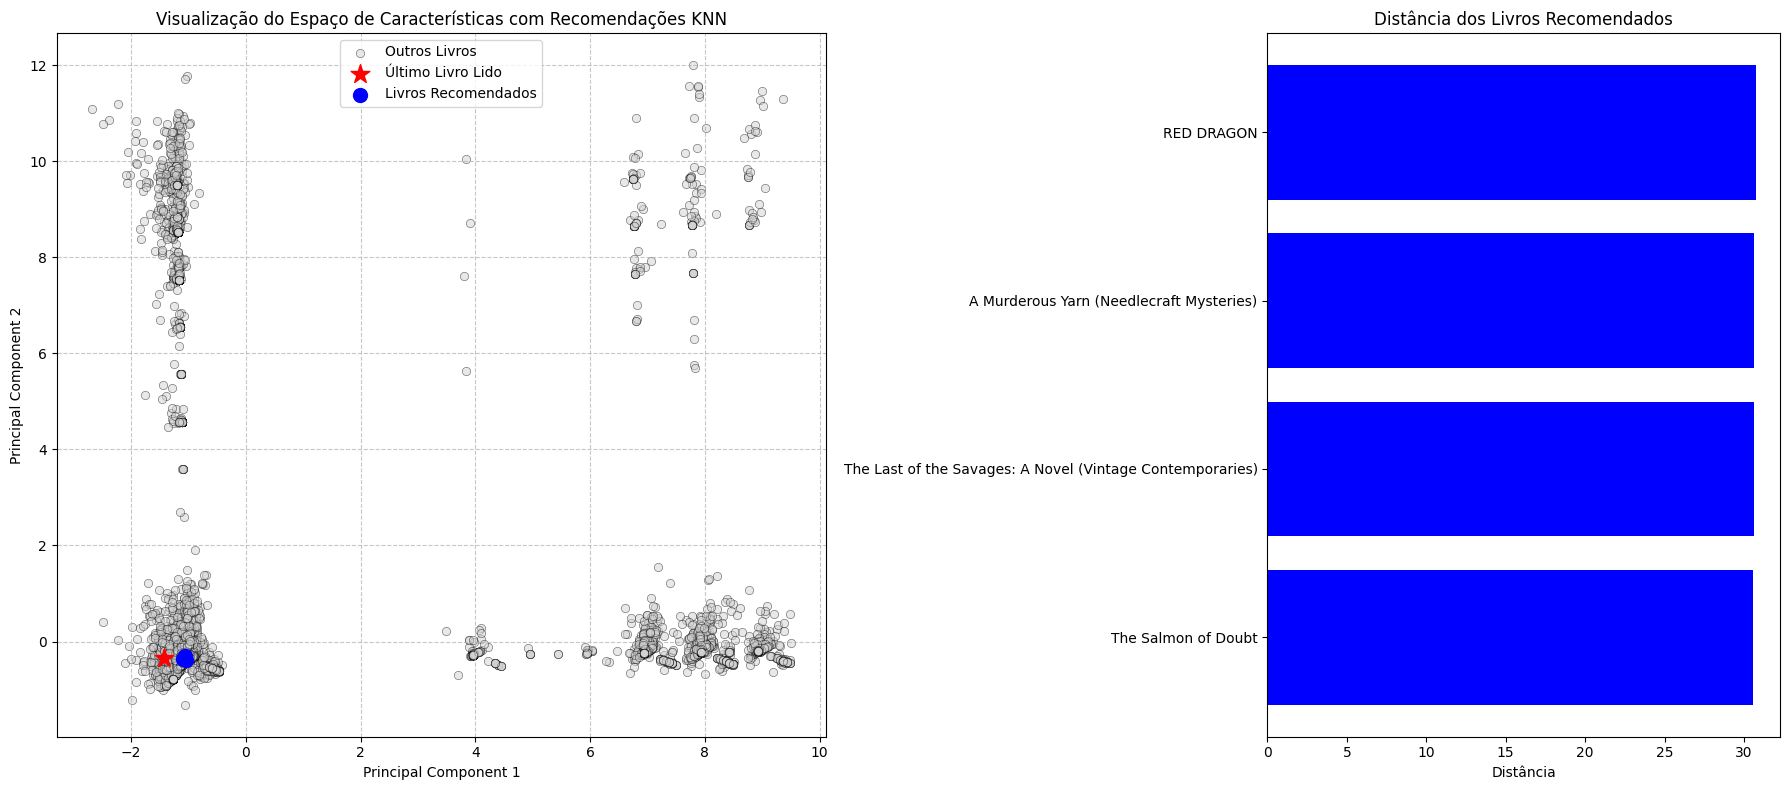

Com base em sua última leitura, acredito que gostaria de ler os livros listados abaixo:
                                   Livro Recomendado  Distância
1                                The Salmon of Doubt  30.545049
2  The Last of the Savages: A Novel (Vintage Cont...  30.594117
3           A Murderous Yarn (Needlecraft Mysteries)  30.610456
4                                         RED DRAGON  30.724583


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# INTERAÇÃO COM O MODELO
ultimo_livro_lido = input("Qual o nome do último livro que você leu? ")

# Tratamento de entrada
while ultimo_livro_lido not in books_pivot.index:
    print("Livro não encontrado. Por favor, insira um livro válido.")
    ultimo_livro_lido = input("Qual o nome do último livro que você leu? ")

# Obtenha as sugestões do modelo
distancia, sugestoes = Knn_Books.kneighbors(books_pivot.loc[[ultimo_livro_lido]])

# Crie um DataFrame com os livros recomendados e suas distâncias
recomendacoes_df = pd.DataFrame({
    'Livro Recomendado': books_pivot.index[sugestoes[0]],
    'Distância': distancia[0]
})

# Remova o livro indicado pelo usuário da lista de recomendações
recomendacoes_df = recomendacoes_df[recomendacoes_df['Livro Recomendado'] != ultimo_livro_lido]

# Ordene o DataFrame pelo ranking (distância)
recomendacoes_df = recomendacoes_df.sort_values(by='Distância')

# Reduza as dimensões usando PCA para visualização
pca = PCA(n_components=2)
livros_pca = pca.fit_transform(books_pivot)

# Plotar o gráfico de dispersão com as recomendações e gráfico de barras ao lado
fig, axs = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [3, 2]})

# Scatter plot para todos os livros
axs[0].scatter(livros_pca[:, 0], livros_pca[:, 1], alpha=0.5, label='Outros Livros', color='lightgray', edgecolors='black', linewidths=0.5)

# Destaque o último livro lido
ultimo_livro_pca = pca.transform(books_pivot.loc[[ultimo_livro_lido]])
axs[0].scatter(ultimo_livro_pca[:, 0], ultimo_livro_pca[:, 1], color='red', marker='*', s=200, label='Último Livro Lido')

# Destaque os livros recomendados
recomendacoes_pca = pca.transform(books_pivot.loc[recomendacoes_df['Livro Recomendado']])
axs[0].scatter(recomendacoes_pca[:, 0], recomendacoes_pca[:, 1], color='blue', marker='o', s=100, label='Livros Recomendados')


# Adicionar gráfico de barras ao lado direito
axs[1].barh(recomendacoes_df['Livro Recomendado'], recomendacoes_df['Distância'], color='blue')
axs[1].set_xlabel('Distância')
axs[1].set_title('Distância dos Livros Recomendados')

# Ajustar o layout e adicionar elementos visuais
axs[0].set_title('Visualização do Espaço de Características com Recomendações KNN')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imprima a recomendação
print(f"Com base em sua última leitura, acredito que gostaria de ler os livros listados abaixo:")
print(recomendacoes_df[['Livro Recomendado', 'Distância']])
